<a href="https://colab.research.google.com/github/ange86rosales-oss/Angelina_Rosales/blob/main/proyectoparteiii_rosales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este código realiza tres tareas principales sobre el dataset de partidos de handball femenino:**

1.	Carga del dataset

2.	Limpieza de nombres de columnas: Se eliminan espacios en blanco al inicio o final de los nombres de las columnas, lo que evita errores al acceder a ellas

3.	Cálculo del equipo ganador: Se crea una nueva columna llamada Resultado Partido que indica el nombre del equipo que ganó el partido (según los goles) y si los goles fueron iguales se asigna "Empate".


In [187]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import plotly.figure_factory as ff


ruta_dataset = 'https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/main/Entrega%20proyecto%20final/dataset.csv'
df = pd.read_csv('https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/main/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv')



In [188]:
# Limpieza de columnas
df.columns = df.columns.str.strip()

# Agregar columna 'Resultado Partido'
df["Resultado Partido"] = np.where(df["ScoreA"] > df["ScoreB"], df["TeamA"],
                                   np.where(df["ScoreA"] < df["ScoreB"], df["TeamB"], "Empate"))

# Vista previa
display(df.head())

,Date,TeamA,TeamB,ScoreA,ScoreB,Sex,TournamentName,year,Venue,WinningTeam,Resultado Partido
0,2000/04/23,Angola,Tunisia,30,22,W,AfricanChampionship,2000,Algeria,Angola,Angola
1,2000/04/23,Ivory Coast,Senegal,26,11,W,AfricanChampionship,2000,Algeria,Ivory Coast,Ivory Coast
2,2000/04/25,Angola,Senegal,30,19,W,AfricanChampionship,2000,Algeria,Angola,Angola
3,2000/04/25,Tunisia,Ivory Coast,21,20,W,AfricanChampionship,2000,Algeria,Tunisia,Tunisia
4,2000/04/27,Tunisia,Senegal,36,23,W,AfricanChampionship,2000,Algeria,Tunisia,Tunisia


**Este código realiza un análisis para mostrar qué equipos anotaron más goles en partidos internacionales de handball femenino entre 2010 y 2023**

In [189]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Crear un DataFrame con goles por equipo
goals_by_team = pd.DataFrame({
    "Team": df["TeamA"].tolist() + df["TeamB"].tolist(),
    "Goals": df["ScoreA"].tolist() + df["ScoreB"].tolist()
})

# Calcular goles totales por equipo
total_goals = goals_by_team.groupby("Team")["Goals"].sum().reset_index()

# Ordenar por goles descendente
total_goals = total_goals.sort_values(by="Goals", ascending=False)

# Crear gráfico de barras
fig = px.bar(
    total_goals,
    x="Team",
    y="Goals",
    title="Ranking de Goles Totales por Equipo 2010-2023",
    labels={"Team": "Selección", "Goals": "Goles Totales"}
)

fig.show()

**Este código genera un boxplot que muestra la distribución de la diferencia de goles en los partidos ganados por los 10 equipos con más victorias del 2010 al 2023**

In [190]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Calcular la diferencia de goles
df["GoalDifference"] = abs(df["ScoreA"] - df["ScoreB"])

# Filtrar partidos ganados (excluir empates)
df_wins = df[df["WinningTeam"] != "Draw"]

# Calcular el número de victorias por equipo
victory_counts = df_wins["WinningTeam"].value_counts().nlargest(10).index.tolist()

# Filtrar los partidos ganados por los 10 equipos con más victorias
df_top_wins = df_wins[df_wins["WinningTeam"].isin(victory_counts)]

# Crear gráfico de cajas
fig = px.box(
    df_top_wins,
    x="WinningTeam",
    y="GoalDifference",
    title="Distribución de la Diferencia de Goles por Equipo (Top 10 en Victorias)",
    labels={"WinningTeam": "Equipo Ganador", "GoalDifference": "Diferencia de Goles"}
)

fig.show()

**Este código genera un gráfico tipo treemap que muestra la cantidad de victorias por equipo organizadas por torneo.**

Esto permite ver qué equipos dominan cada torneo

In [191]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Filtrar partidos con ganador (excluir empates)
df_wins = df[df["WinningTeam"] != "Draw"]

# Contar victorias por equipo y torneo
victory_counts = df_wins.groupby(["TournamentName", "WinningTeam"]).size().reset_index(name="Victories")

# Crear gráfico tipo treemap
fig = px.treemap(
    victory_counts,
    path=["TournamentName", "WinningTeam"],
    values="Victories",
    title="Cantidad de Victorias por Equipo según Torneo"
)

fig.show()



**Este código realiza un diagnóstico de valores faltantes (nulos) en cada columna del dataset**

In [192]:
# Diagnóstico de valores perdidos por columna
missing_values = df.isnull().sum()

# Mostrar el resultado
print("Diagnóstico de valores perdidos por columna:")
print(missing_values)


Diagnóstico de valores perdidos por columna:
Date                 0
TeamA                0
TeamB                0
ScoreA               0
ScoreB               0
Sex                  0
TournamentName       0
year                 0
Venue                0
WinningTeam          0
Resultado Partido    0
GoalDifference       0
dtype: int64


**Este código calcula qué equipo tiene la mejor tasa de victorias en cada torneo y muestra los resultados en una tabla.**

In [193]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)


# Filtrar empates
df = df[df['WinningTeam'] != 'Draw']

# Agrupar por torneo y equipo ganador
grouped = df.groupby(['TournamentName', 'WinningTeam']).size().reset_index(name='Wins')

# Total de partidos por torneo
total_matches = df.groupby('TournamentName').size().reset_index(name='TotalMatches')

# Calcular tasa de victorias
data = pd.merge(grouped, total_matches, on='TournamentName')
data['WinRate'] = data['Wins'] / data['TotalMatches']

# Obtener el mejor equipo por torneo
best_teams = data.sort_values(['TournamentName', 'WinRate'], ascending=[True, False])
best_per_tournament = best_teams.groupby('TournamentName').first().reset_index()

print(best_per_tournament[['TournamentName', 'WinningTeam', 'WinRate']])

                         TournamentName         WinningTeam   WinRate
0                   AfricanChampionship              Angola  0.225694
1                     AsianChampionship         South Korea  0.213740
2                          CaribbeanCup                Cuba  0.236842
3      CentralAmericanAndCaribbeanGames  Dominican Republic  0.192308
4           CentralAmericanChampionship           Nicaragua  0.277778
5                  CentralAmericanGames           Guatemala  0.450000
6                  EuropeanChampionship              Norway  0.148649
7                 EuropeanChampionshipQ          Montenegro  0.061584
8                     NorCaChampionship                Cuba  0.206897
9                               Olympic              Norway  0.159184
10          OlympicAfricanQualification              Angola  0.625000
11       OlympicAsianQualificationEvent         South Korea  0.360000
12                             OlympicQ              Russia  0.112500
13                  

**Este codigo expone dos puntos importantes para nuestro analisis:**

- El primer gráfico muestra qué equipos son más efectivos en cada torneo.

- El segundo gráfico muestra qué equipos son globalmente más dominantes en la historia del dataset.

In [194]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Filtrar partidos con ganador
df = df[df['WinningTeam'] != 'Draw']

# --- 1) Promedio de victorias por torneo ---
wins_per_tournament = df.groupby(['TournamentName', 'WinningTeam']).size().reset_index(name='Wins')
total_matches_per_tournament = df.groupby('TournamentName').size().reset_index(name='TotalMatches')

wins_per_tournament = wins_per_tournament.merge(total_matches_per_tournament, on='TournamentName')
wins_per_tournament['WinRate'] = wins_per_tournament['Wins'] / wins_per_tournament['TotalMatches']

wins_sorted = wins_per_tournament.sort_values('WinRate', ascending=False).head(15)

fig1 = px.bar(wins_sorted, x='WinningTeam', y='WinRate', color='TournamentName',
              title='Top 15 equipos con mejor promedio de victorias por torneo',
              labels={'WinningTeam': 'Equipo', 'WinRate': 'Promedio de victorias'})
fig1.show()

# --- 2) Ranking global ---
global_wins = df.groupby('WinningTeam').size().reset_index(name='TotalWins')
global_wins_sorted = global_wins.sort_values('TotalWins', ascending=False).head(20)

fig2 = px.bar(global_wins_sorted, x='WinningTeam', y='TotalWins',
              title='Ranking global de equipos más dominantes (total de victorias)',
              labels={'WinningTeam': 'Equipo', 'TotalWins': 'Total de victorias'})
fig2.show()

**Este código realiza un EDA con los resultados de partidos de handball femenino.**

- Aqui vemos la distribución de goles, es decir los equipos que más anotan.
- Cuales son los torneos más frecuentes, es decir, ¿Dónde se juega más?
- Y por útimo la correlación entre goles, es decir, los partidos son palo y palo o desparejos?

In [195]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)


# Información general
print(df.info())
print(df.describe())

# Valores nulos
print(df.isnull().sum())

# Histogramas
px.histogram(df, x="ScoreA", nbins=20, title="Distribución ScoreA").show()
px.histogram(df, x="ScoreB", nbins=20, title="Distribución ScoreB").show()
px.histogram(df, x="year", nbins=20, title="Distribución Year").show()

# Boxplot
px.box(df.melt(value_vars=['ScoreA','ScoreB'], var_name='Equipo', value_name='Goles'),
       x='Equipo', y='Goles', title='Boxplot ScoreA vs ScoreB').show()

# Conteo categorías
print(df['TournamentName'].value_counts().head(10))
print(df['WinningTeam'].value_counts().head(10))

# Heatmap correlación
corr_matrix = df[['ScoreA','ScoreB']].corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=corr_matrix.columns.tolist(),
                                  y=corr_matrix.columns.tolist(),
                                  annotation_text=corr_matrix.round(2).values)
fig.show()

<class 'pandas.core.frame.DataFrame'>
Index: 3717 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3717 non-null   object
 1   TeamA              3717 non-null   object
 2   TeamB              3717 non-null   object
 3   ScoreA             3717 non-null   int64 
 4   ScoreB             3717 non-null   int64 
 5   Sex                3717 non-null   object
 6   TournamentName     3717 non-null   object
 7   year               3717 non-null   int64 
 8   Venue              3717 non-null   object
 9   WinningTeam        3717 non-null   object
 10  Resultado Partido  3717 non-null   object
 11  GoalDifference     3717 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 377.5+ KB
None
            ScoreA       ScoreB         year  GoalDifference
count  3717.000000  3717.000000  3717.000000     3717.000000
mean     27.420769    25.487490  2014.274953        9.707829


TournamentName
WorldChampionship                   987
EuropeanChampionshipQ               682
EuropeanChampionship                518
AfricanChampionship                 288
AsianChampionship                   262
Olympic                             245
WChEuropeanQ                        230
CentralAmericanAndCaribbeanGames    104
PanAmericanGames                    100
OlympicQ                             80
Name: count, dtype: int64
WinningTeam
Norway         225
France         193
Russia         175
Denmark        166
Hungary        149
Romania        140
Germany        129
Spain          129
Sweden         129
South Korea    125
Name: count, dtype: int64


**Aqui eliminamos datos que pueden distorsionar análisis estadísticos y modelos predictivos, la finalidad es mejorar la calidad del dataset para obtener resultados más confiables
Tambien evita errores en modelos predictivos que no aceptan valores nulos y mejora la calidad del dataset para análisis estadísticos.**

In [196]:
# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar outliers usando IQR
for col in ['ScoreA', 'ScoreB']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Guardar dataset limpio
df.to_csv("Handball_W_InternationalResults_clean.csv", index=False)

In [197]:
# Identificar columnas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputación numérica (media)
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

# Imputación categórica (moda)
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

# Guardar dataset imputado
df.to_csv("Handball_W_InternationalResults_imputed.csv", index=False)

**Aqui observamos la distribucion de la dispersión de los equipos, es decir, si hay patrones o agrupamientos y correlaciones entre las variables.**

El gráfico muestra la relación entre los goles anotados por el Equipo A y el Equipo B en cada partido. La línea de tendencia (OLS) indica cuando un equipo anota , el otro equipo tiende a anotar más goles. Esto sugiere que los partidos suelen ser competitivos, con ambos equipos anotando en rangos similares.

In [198]:
# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Crear gráfico de dispersión con línea de tendencia entre ScoreA y ScoreB
fig = px.scatter(
    df,
    x="ScoreB",
    y="ScoreA",
    trendline="ols",  # Agrega línea de regresión lineal
    title="Relación entre goles del equipo B (ScoreB) y del equipo A (ScoreA)",
    labels={"ScoreB": "Goles del Equipo B", "ScoreA": "Goles del Equipo A"}
)

fig.show()

**Aqui realizamos un análisis predictivo utilizando regresión lineal para estimar la cantidad total de goles anotados basándose en el año y el nombre del torneo.**

In [199]:
df['TotalGoals'] = df['ScoreA'] + df['ScoreB']

# Variables
X = df[['TournamentName', 'year']]
y = df['TotalGoals']

# Dummies para torneos
X = pd.get_dummies(X, columns=['TournamentName'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación
r2 = r2_score(y_test, model.predict(X_test))
print("R²:", r2)

# Coeficientes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

# Predicción ejemplo
example = pd.DataFrame([[2025] + [0]*(len(X.columns)-1)], columns=X.columns)
pred_example = model.predict(example)[0]
print("Predicción WorldChampionship 2025:", pred_example)

R²: 0.010315718034552779
                                              Feature  Coefficient
0                                                year     0.021599
1                    TournamentName_AsianChampionship     3.243425
2                         TournamentName_CaribbeanCup     4.806844
3     TournamentName_CentralAmericanAndCaribbeanGames     2.876789
4          TournamentName_CentralAmericanChampionship     0.526563
5                 TournamentName_CentralAmericanGames    -2.503896
6                 TournamentName_EuropeanChampionship     0.931312
7                TournamentName_EuropeanChampionshipQ     2.172479
8                    TournamentName_NorCaChampionship     0.851557
9                              TournamentName_Olympic     2.597698
10         TournamentName_OlympicAfricanQualification    -7.315153
11      TournamentName_OlympicAsianQualificationEvent     1.239512
12                            TournamentName_OlympicQ     2.806087
13                    TournamentName_

**Aqui realizamos un análisis de regresión lineal utilizando la librería statsmodels para entender cómo el año y el tipo de torneo influyen en la cantidad total de goles anotados.**

In [200]:
df['TotalGoals'] = df['ScoreA'] + df['ScoreB']

# Modelo simple
X_simple = sm.add_constant(df['year'].astype(float))
y = df['TotalGoals'].astype(float)
model_simple = sm.OLS(y, X_simple).fit()

# Modelo múltiple
dummies = pd.get_dummies(df['TournamentName'], drop_first=True)
X_multiple = pd.concat([df['year'], dummies], axis=1).astype(float)
X_multiple = sm.add_constant(X_multiple)
model_multiple = sm.OLS(y, X_multiple).fit()

# Predicción
pred_cols = model_multiple.model.exog_names
pred_data = pd.DataFrame([[0]*len(pred_cols)], columns=pred_cols)
pred_data['const'] = 1
pred_data['year'] = 2025
if 'WorldChampionship' in pred_data.columns:
    pred_data['WorldChampionship'] = 1
prediction = model_multiple.predict(pred_data)[0]

**Aqui intentamos predecir los goles anotados por el equipo A (ScoreA) en función de los goles recibidos (ScoreB) y el año del partido (year) se hace mediante una regresión lineal ordinaria (OLS).**

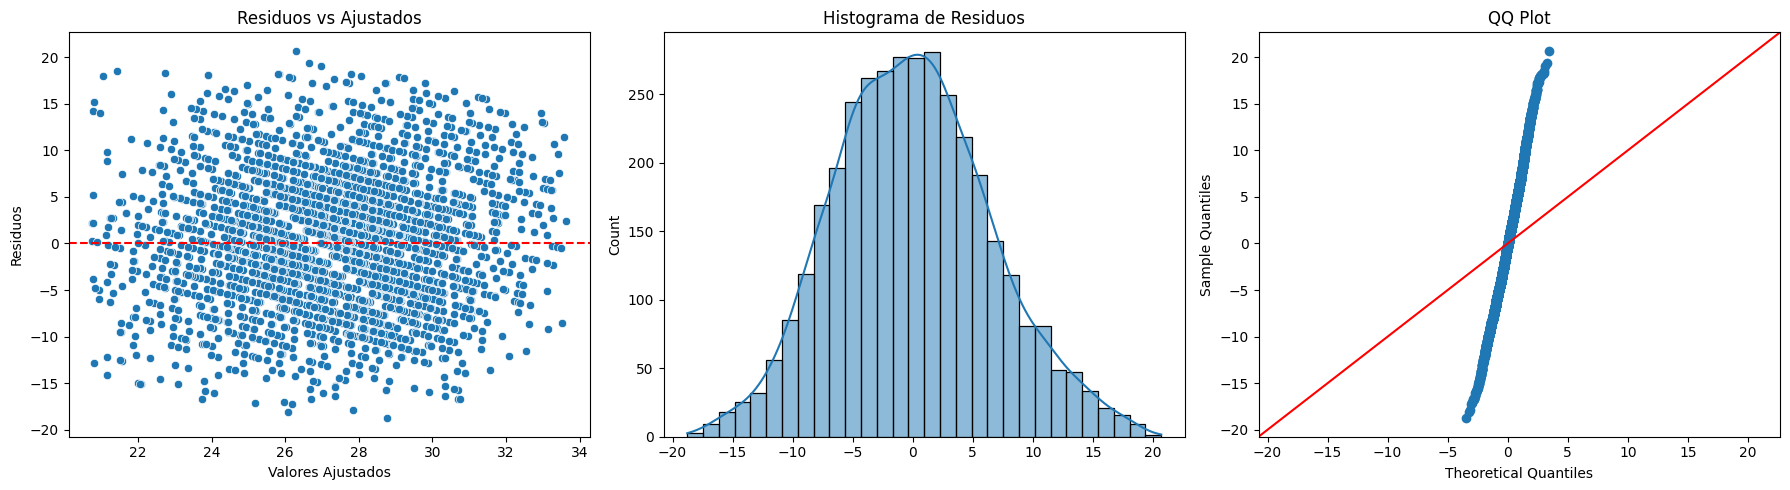

In [201]:
# Crear variable dependiente y predictoras
# Usamos ScoreA como dependiente y ScoreB + year como predictoras
X = df[["ScoreB", "year"]]
y = df["ScoreA"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo OLS
model = sm.OLS(y, X).fit()

# Obtener residuos y valores ajustados
residuals = model.resid
fitted = model.fittedvalues

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuos vs Ajustados
sns.scatterplot(x=fitted, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuos vs Ajustados')
axes[0].set_xlabel('Valores Ajustados')
axes[0].set_ylabel('Residuos')

# 2. Histograma de residuos
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histograma de Residuos')

# 3. QQ Plot
sm.qqplot(residuals, line='45', ax=axes[2])
axes[2].set_title('QQ Plot')

plt.tight_layout()
plt.show()

**Aqui queremos determinar qué variables tienen mayor influencia en la cantidad de goles anotados por el equipo A y visualizar la importancia relativa de cada variable.**

In [202]:
# Eliminar columnas irrelevantes y manejar valores nulos
df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de variables
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar ranking
print("Ranking de importancia de variables (Random Forest):")
print(importance_df)

# Crear gráfico de barras
fig = px.bar(importance_df, x='Variable', y='Importancia',
             title='Importancia de Variables (Random Forest)', text='Importancia')
fig.show()

Ranking de importancia de variables (Random Forest):
             Variable  Importancia
10         TotalGoals     0.428818
9      GoalDifference     0.284597
2              ScoreB     0.284432
6               Venue     0.000413
5                year     0.000367
1               TeamB     0.000324
0               TeamA     0.000304
4      TournamentName     0.000252
7         WinningTeam     0.000250
8   Resultado Partido     0.000242
3                 Sex     0.000000


**Aqui se pretende identificar selecciones dominantes y evaluar rendimientos históricos, preparación de partidos y análisis estratégico.**

In [203]:
# Crear variable objetivo: 1 si TeamA gana, 0 si no
df['WinA'] = (df['ScoreA'] > df['ScoreB']).astype(int)

# Calcular tasa de victorias por país (TeamA)
victory_rate = df.groupby('TeamA')['WinA'].mean().sort_values(ascending=False)
victory_rate_df = victory_rate.reset_index()
victory_rate_df.columns = ['Pais', 'Tasa_Victoria']

# Mostrar top 10 países más determinantes
print("Top 10 países con mayor tasa de victoria:")
print(victory_rate_df.head(10))

# Crear gráfico de barras
fig = px.bar(victory_rate_df.head(10), x='Pais', y='Tasa_Victoria',
             title='Top 10 Países con Mayor Tasa de Victoria', text='Tasa_Victoria')
fig.show()

Top 10 países con mayor tasa de victoria:
                    Pais  Tasa_Victoria
0                  Gabon       1.000000
1  Serbia and Montenegro       1.000000
2            North Korea       0.875000
3                 Norway       0.849315
4                 Russia       0.826087
5                 Brazil       0.785714
6                   Cuba       0.755556
7                 Jordan       0.750000
8                 Angola       0.750000
9            South Korea       0.734043


**Aqui verificamos el entrenamiento de modelos supervisados ya que se analiza:**

Entrenamiento (Train): Se usa para ajustar el modelo.

Validación (Validation): Se usa para ajustar hiperparámetros y evitar sobreajuste.

Prueba (Test): Se usa para evaluar el rendimiento final del modelo en datos no vistos.


In [204]:
# Crear variable objetivo: 1 si TeamA gana, 0 si no
df['WinA'] = (df['ScoreA'] > df['ScoreB']).astype(int)

# Eliminar columnas irrelevantes y manejar valores nulos
# df = df.drop(columns=['Date'])
df = df.dropna()

# Definir X (predictoras) y y (objetivo)
X = df.drop(columns=['WinA'])
y = df['WinA']

# División en Train (70%), Validation (15%), Test (15%) con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Mostrar tamaños de cada conjunto
print("Tamaños de los conjuntos:")
print(f"Train: {X_train.shape[0]} filas")
print(f"Validation: {X_val.shape[0]} filas")
print(f"Test: {X_test.shape[0]} filas")

Tamaños de los conjuntos:
Train: 2503 filas
Validation: 537 filas
Test: 537 filas


**Aqui buscamos predecir los goles anotados por el equipo A (ScoreA), y evalúa su rendimiento en conjuntos de validación y prueba con Métricas de evaluación (R²) y Error promedio en la predicción (RMSE)**

In [205]:
# Eliminar columnas irrelevantes y manejar valores nulos
# df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# División en Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones en Validation y Test
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular métricas R² y RMSE
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Mostrar resultados
print("Evaluación del modelo RandomForestRegressor:")
print(f"Validation -> R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}")
print(f"Test -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

Evaluación del modelo RandomForestRegressor:
Validation -> R²: 0.9979, RMSE: 0.3307
Test -> R²: 0.9974, RMSE: 0.3458


**Aqui buscamos predecir los goles del equipo A (ScoreA) y evalúa el modelo con tres métricas:**

R² : variabilidad de los datos.

RMSE: indica cuánto se desvía la predicción en la misma escala que los goles.

MAE : error absoluto promedio.

In [206]:
# Preprocesamiento: eliminar columnas irrelevantes y manejar valores nulos
# df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular métricas
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mostrar resultados
print("Evaluación del modelo RandomForestRegressor:")
print(f"Validation -> R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}, MAE: {mae_val:.4f}")
print(f"Test -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

Evaluación del modelo RandomForestRegressor:
Validation -> R²: 0.9979, RMSE: 0.3307, MAE: 0.1439
Test -> R²: 0.9974, RMSE: 0.3458, MAE: 0.1425


**Aqui dividimos el dataset en tres conjuntos para entrenar el modelo en datos conocidos, validar para ajustar hiperparámetros y evitar sobreajuste y para medir el rendimiento en datos no vistos.**

In [207]:
# Preprocesamiento: eliminar columnas irrelevantes y manejar valores nulos
# df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# División en Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

**Aqui lo que se pretende estimar es la tendencia histórica y proyectar qué equipos podrían dominar en el futuro.**

In [208]:
# Filtrar solo partidos del torneo World Championship
df_wc = df[df['TournamentName'] == 'WorldChampionship']

# Eliminar empates
df_wc = df_wc[df_wc['WinningTeam'] != 'Draw']

# Contar victorias por equipo y año
victories = df_wc.groupby(['WinningTeam', 'year']).size().reset_index(name='Victories')

# Crear dataset para modelado
X = victories[['WinningTeam', 'year']]
y = victories['Victories']

# Codificar variable categórica (WinningTeam)
le_team = LabelEncoder()
X['WinningTeam'] = le_team.fit_transform(X['WinningTeam'])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar con MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# Predecir para el año 2025 para todos los equipos históricos
teams = victories['WinningTeam'].unique()
future_data = pd.DataFrame({'WinningTeam': teams, 'year': 2025})
future_data['WinningTeam'] = le_team.transform(future_data['WinningTeam'])

# Predecir victorias
future_predictions = model.predict(future_data)
future_data['PredictedVictories'] = future_predictions

# Obtener el equipo con más victorias proyectadas
future_data['TeamName'] = le_team.inverse_transform(future_data['WinningTeam'])
best_team = future_data.sort_values('PredictedVictories', ascending=False).iloc[0]

print("\nEquipo con mayor cantidad de victorias proyectadas en el World Championship 2025:")
print(f"Equipo: {best_team['TeamName']}, Victorias proyectadas: {best_team['PredictedVictories']:.2f}")

MAE: 1.39

Equipo con mayor cantidad de victorias proyectadas en el World Championship 2025:
Equipo: France, Victorias proyectadas: 8.30


**Aqui lo que se intenta es estimar goles futuros en función de características históricas, analizar y saber qué factores influyen más (torneo, año, rival), ajustar variables y parámetros para mejorar la precisión y facilitar la interpretación de resultados para informes o presentaciones.**

In [209]:
# 1. Preprocesamiento: eliminar columnas irrelevantes y manejar valores nulos
# df = df.drop(columns=['Date', 'Sex'])  # Excluimos 'Sex'
df = df.dropna()

# 2. Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# 3. Codificar variables categóricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 4. Selección de características con SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # puedes cambiar 'all' por un número
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

# 5. División en Train, Validation y Test
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 6. Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Predicciones
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# 8. Métricas
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Evaluación del modelo RandomForestRegressor con SelectKBest (sin 'Sex'):")
print(f"Validation -> R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}, MAE: {mae_val:.4f}")
print(f"Test -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

print("\nCaracterísticas seleccionadas por SelectKBest:")
for feature in selected_features:
    print(f"- {feature}")

# 9. Importancia de variables
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Variable': selected_features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# 10. Gráfico de importancia
fig = px.bar(importance_df, x='Variable', y='Importancia',
             title='Random Forest', text='Importancia')
fig.show()

Evaluación del modelo RandomForestRegressor con SelectKBest (sin 'Sex'):
Validation -> R²: 0.9979, RMSE: 0.3307, MAE: 0.1439
Test -> R²: 0.9974, RMSE: 0.3458, MAE: 0.1425

Características seleccionadas por SelectKBest:
- TeamA
- TeamB
- ScoreB
- Sex
- TournamentName
- year
- Venue
- WinningTeam
- Resultado Partido
- GoalDifference
- TotalGoals
- WinA
